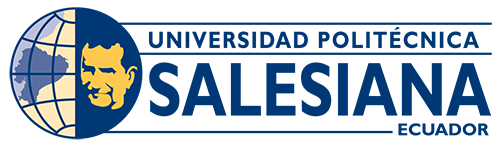

#Practica 3 
#**PARTE 1**

**Nombres:** Tracy Cárdenas, David Paguay

**Carrera:** Computación

**Fecha:** 26/06/2022


Importación e Instalación de Módulos y Liberías necesarias para el desarrollo de la práctica

In [ ]:
pip install mahotas

In [60]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist,fashion_mnist

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

#Momentos de Zernike
import mahotas

#Distancia euclidea
from scipy.spatial import distance

#Matriz de confusion
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns



In [51]:
#Cargar Fashion Mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [52]:
#Division por categorias de datos para train y test

#TRAIN
bagTrain = np.where(y_train==8)[0]
bagTrain = bagTrain[0:1000]

dressTrain = np.where(y_train==3)[0]
dressTrain = dressTrain[0:1000]

sneakerTrain = np.where(y_train==7)[0]
sneakerTrain = sneakerTrain[0:1000]

trouserTrain = np.where(y_train==1)[0]
trouserTrain = trouserTrain[0:1000]

#Concatenamos los valores de las posiciones de Train de las 4 categorias
y_trainCategorias = np.concatenate((bagTrain,dressTrain, sneakerTrain,trouserTrain),axis=None)

#TEST
bagTest = np.where(y_test==8)[0]
bagTest = bagTest[0:100]

dressTest = np.where(y_test==3)[0]
dressTest = dressTest[0:100]

sneakerTest = np.where(y_test==7)[0]
sneakerTest = sneakerTest[0:100]

trouserTest = np.where(y_test==1)[0]
trouserTest = trouserTest[0:100]

Testcompleto = [bagTest,dressTest,sneakerTest,trouserTest]



In [53]:
#Para no recorrer x_train y y_train que contienen 60000 valores, creamos nuevas variables
# con 4000 valores que corresponden a las 1000 posiciones de cada categoría
x_train4000 = []
y_train4000 = []

for i in range(len(y_trainCategorias)):
  valy = y_trainCategorias[i]
  x_train4000.append(x_train[valy,:])
  y_train4000.append(y_train[valy])

In [54]:
TrainListFinal = []
radius = 10
"""Establecemos un valor inicial para luego ir guardando en esta variable la distancia euclidea
y obtener la menor de las 4000"""
r=200.00
pTrain = 0
for i in range(len(Testcompleto)):
      pTrainList = []
      #Recorremos las 100 imagenes de cada categoria del test
      for j in range (100):
              pTest = Testcompleto[i][j]
              for x in range(len(x_train4000)):
                    imgTest = x_test[pTest,:]
                    imgTrain = x_train4000[x]

                    #CALCULO DE MOMENTOS DE ZERNIKE
                    zernikeTest = mahotas.features.zernike_moments(imgTest,radius)
                    zernikeTrain = mahotas.features.zernike_moments(imgTrain,radius)

                    #Distancia euclidea
                    distEuclidea = distance.euclidean(zernikeTest, zernikeTrain)

                    #Buscamos la distancia que sea menor de las 4000 imagenes del Train
                    if(distEuclidea<r):
                      #Guardamos la posicion en la que se encuentra la imagen con menor distancia
                      pTrain = x
                      r = distEuclidea
                      
              """Agregamos a una lista las 100 posiciones que tienen los valores menores de la distancia euclidea 
              #obtenida a partir de los momentos de Zernike de test y train """
              pTrainList.append(pTrain)
              r = 200.00

      """Agregamos a una lista final que contiene los 100 valores menores para cada categoria"""
      TrainListFinal.append(pTrainList)


In [55]:
"""
  Aqui creamos nuevas listas de Test y Train 
  para armar la matriz de Confusion 
    """
catTrain = []
catTest = []
for i in range(4):
  for j in range(100):
    p = TrainListFinal[i][j]
    p2 = Testcompleto[i][j]

    trainV = y_train4000[p]
    testV = y_test[p2]

    #Valores obtenidos a partir del descriptor de Zernike
    catTrain.append(trainV)

    #Valores del Test inicial
    catTest.append(testV)

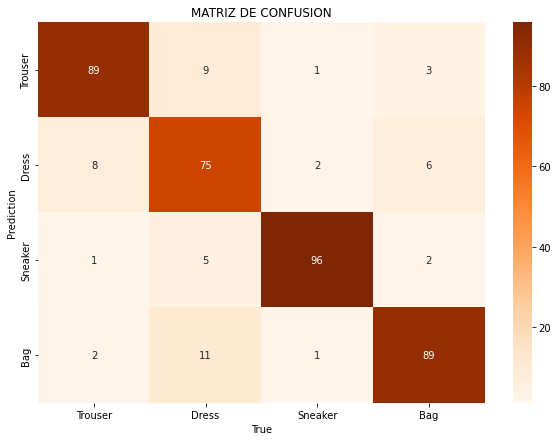

<Figure size 432x288 with 0 Axes>

In [68]:
#MATRIZ DE CONFUSION 
#Utilizando una librería propia de python

matConf = confusion_matrix(catTrain,catTest)
cols = ['Trouser', 'Dress','Sneaker','Bag']
df_matConf = pd.DataFrame(matConf, index = cols, columns= cols)
plt.figure(figsize = (10,7))
grf = sns.heatmap(df_matConf, cmap = 'Oranges',annot=True)

grf.set(xlabel = 'True', yLabel='Prediction')
plt.title("MATRIZ DE CONFUSION")
plt.show()  
plt.savefig("confusion_matrix.png")
